import libraries

In [50]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from functools import reduce

define hyperparameters

In [51]:
EPOCH = 1000
BATCH_SIZE = 64
LR = 0.01

download and import mnist data

In [52]:
train_data = torchvision.datasets.MNIST(root='./',train=False,download=True,transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='./',train=False,transform=torchvision.transforms.ToTensor())
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)
train_x = Variable(train_data.test_data.view(-1,28*28)).type(torch.FloatTensor)
train_y = train_data.test_labels
test_x = Variable(test_data.test_data.view(-1, 28*28)).type(torch.FloatTensor)
test_y = test_data.test_labels

Define Fully Connected Neural Network

In [53]:
class FCNets(nn.Module):
    def __init__(self,nlist):
        super(FCNets,self).__init__()
        if len(nlist) < 2:
            print('error:not enough layers')
        else:
            self.fc = nn.Sequential()
            for n in range(len(nlist)-1):
                self.fc.add_module('linear' + str(n+1), nn.Linear(in_features=nlist[n], out_features=nlist[n+1]))
                self.fc.add_module('relu' + str(n+1), nn.ReLU())
            #self.fc.add_module('softmax', nn.Softmax())
    def forward(self,x):
        return self.fc(x)

Define Neural Net instance and optimizer, loss function

In [54]:
fc = FCNets([28*28,32,10])
print(fc)
optimizer = torch.optim.SGD(params=fc.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

FCNets(
  (fc): Sequential(
    (linear1): Linear(in_features=784, out_features=32)
    (relu1): ReLU()
    (linear2): Linear(in_features=32, out_features=10)
    (relu2): ReLU()
  )
)


In [55]:
train_acc =  []
test_acc = []
epochs = []
train_loss = []

In [56]:
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        x = x.view(-1,28*28)
        bx = Variable(x)
        by = Variable(y)
        output = fc(bx)
        loss = loss_func(output, by)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch%5 == 0:
        test_y_predict = torch.max(fc(test_x),1)[1].data
        train_y_predict = torch.max(fc(train_x),1)[1].data
        test_accuracy = sum(test_y_predict == test_y)/len(test_y)
        train_accuracy = sum(train_y_predict == train_y)/len(train_y)
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)
        epochs.append(epoch)
        train_loss.append(loss)
        print('Epoch:',epoch,'train loss:%.4f' %loss.data[0],'train accuracy is:%.3f' %train_accuracy,'test accuracy is:%.3f' %test_accuracy)
        

Epoch: 0 train loss:2.0856 train accuracy is:0.440 test accuracy is:0.440
Epoch: 5 train loss:0.9137 train accuracy is:0.837 test accuracy is:0.837
Epoch: 10 train loss:0.4119 train accuracy is:0.884 test accuracy is:0.884
Epoch: 15 train loss:0.2136 train accuracy is:0.896 test accuracy is:0.896
Epoch: 20 train loss:0.1852 train accuracy is:0.908 test accuracy is:0.908
Epoch: 25 train loss:0.1410 train accuracy is:0.911 test accuracy is:0.911
Epoch: 30 train loss:0.0971 train accuracy is:0.915 test accuracy is:0.915
Epoch: 35 train loss:0.3928 train accuracy is:0.920 test accuracy is:0.920
Epoch: 40 train loss:0.4202 train accuracy is:0.921 test accuracy is:0.921
Epoch: 45 train loss:0.3545 train accuracy is:0.925 test accuracy is:0.925
Epoch: 50 train loss:0.3864 train accuracy is:0.927 test accuracy is:0.927
Epoch: 55 train loss:0.2877 train accuracy is:0.930 test accuracy is:0.930
Epoch: 60 train loss:0.2945 train accuracy is:0.933 test accuracy is:0.933
Epoch: 65 train loss:0.1151

if neural nets size is 784 10
with lr = 0.01 
achieve accuracy of 92%
if neural nets size is 784 32 10
with lr = 0.01 epoch=1000
achieve accuracy of 99.5%

In [57]:
for param in fc.parameters():
    print(type(param.data), param.size())

<class 'torch.FloatTensor'> torch.Size([32, 784])
<class 'torch.FloatTensor'> torch.Size([32])
<class 'torch.FloatTensor'> torch.Size([10, 32])
<class 'torch.FloatTensor'> torch.Size([10])


In [58]:
torch.save(fc,'fc.pkl')

/home/yunyou/anaconda3/lib/python3.6/site-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type FCNets. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


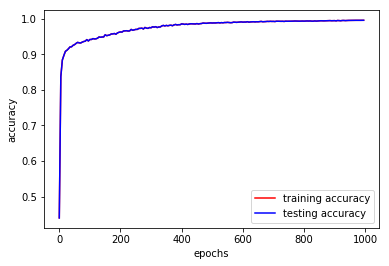

In [64]:
plt.plot(epochs,train_acc,'r',label = 'training accuracy')
plt.plot(epochs,test_acc,'b',label= 'testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

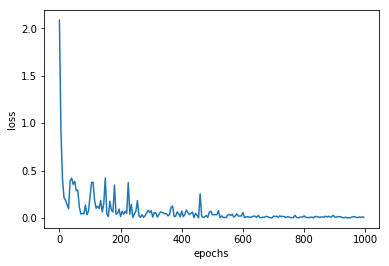

In [65]:
plt.plot(epochs,[i.data[0] for i in train_loss])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()